In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


In [2]:
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [3]:
# Check for missing values
print(X.isnull().sum().sum())

0


In [4]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

In [10]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name}:\nAccuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=data.target_names))


Logistic Regression:
Accuracy: 0.9737
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree:
Accuracy: 0.9474
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Random Forest:
Accuracy: 0.9649
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97

In [9]:
import matplotlib.pyplot as plt


In [11]:
# Display results
for name, score in results.items():
    print(f"{name}: {score:.4f}")

Logistic Regression: 0.9737
Decision Tree: 0.9474
Random Forest: 0.9649
SVM: 0.9737
k-NN: 0.9474


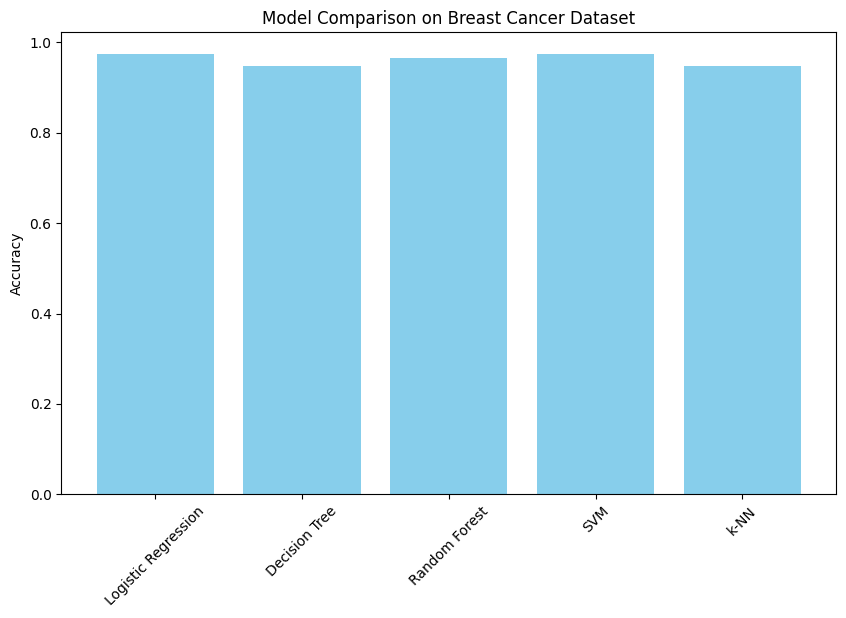

In [12]:
# Plot
plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison on Breast Cancer Dataset')
plt.xticks(rotation=45)
plt.show()